In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.plots as plots

# open database use OpsimDatabase
# opsdb = db.OpsimDatabase('baseline2018a.db')

# output
outDir = 'outdir'
resultsDb = db.ResultsDb(outDir=outDir)
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots

import [TDEsMetricTest](https://github.com/xiaolng/maf/blob/master/TDEsMetricTest.py)

In [2]:
from mycode.TDEsMetricTest import TDEsMetricTest

In [6]:
# light curve file
asciifile = 'TDEfaintfast_z0.1.dat'

# query columns 
mjdCol = 'observationStartMJD'
m5Col = 'fiveSigmaDepth'
filterCol = 'filter'
detectSNR={'u': 5, 'g': 5, 'r': 5, 'i': 5, 'z': 5, 'y': 5}

# light curve parameters
epochStart = -22
peakEpoch = 0
nearPeakT = 5
nPhaseCheck = 1

# condition parameters
nObsTotal = {'u': 0, 'g': 0, 'r': 0, 'i': 0, 'z': 0, 'y': 0}
nObsPrePeak = 0
nObsNearPeak={'u': 0, 'g': 0, 'r': 0, 'i': 0, 'z': 0, 'y': 0}
nFiltersNearPeak = 0
nObsPostPeak=0 
nFiltersPostPeak = 0



In [8]:
# plot light curve
def plotlc(dataSlice, time_key='time', mag_key='mag', filter_key='filter', err_key = None):
    
    colors = {'u':'k', 'g':'b', 'r':'r', 'i':'m', 'z':'orange', 'y':'c'}
    
    plt.figure(figsize=(10, 6))
    for f in np.unique(dataSlice[filter_key]):
        fmatch = dataSlice[filter_key]==f
        time = dataSlice[time_key][fmatch]
        mag = dataSlice[mag_key][fmatch]
        
        if err_key!=None:
            mag_err = dataSlice[err_key][fmatch]
            plt.errorbar(time, mag, yerr=mag_err, color=colors[f], fmt='.', label=f)
        else:
            plt.scatter(time, mag, color=colors[f], marker='*', label=f)

    plt.legend()
    plt.xlabel('days')
    plt.ylabel('mag')
    plt.ylim(plt.ylim()[::-1])

## baseline2018.db

In [4]:
opsdb_baseline = db.OpsimDatabase('baseline2018a.db')

Finish initializing metric
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night<300 for columns ['fieldDec', 'observationStartMJD', 'filter', 'fiveSigmaDepth', 'fieldRA']
Found 195853 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<300" constraint now.


/home/docmaf/repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/home/docmaf/repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.980654  dipole: lon: -164.097, lat: -5.36978, amp: 0.0423857
Plotting complete.


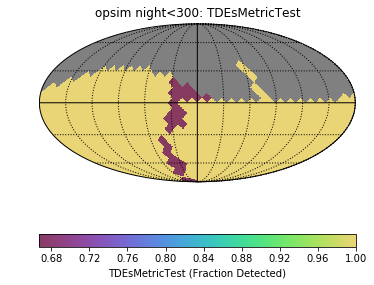

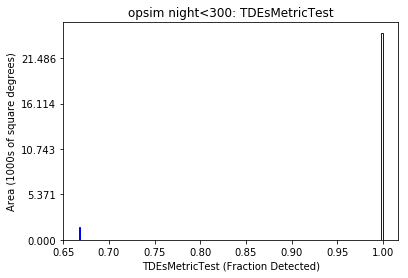

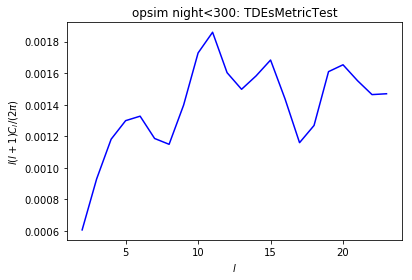

In [7]:
## get skymap
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=5, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=False)

slicer = slicers.HealpixSlicer(nside=8) 
sqlconstraint = 'night<300'

transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_baseline, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)


In [10]:
## get light curve
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=5, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=True)

ra = np.array([34.39339593])
dec = np.array([-5.09032894])
slicer = slicers.UserPointsSlicer(ra, dec)

sqlconstraint = 'night<300'
transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_baseline, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)


Finish initializing metric
Querying database SummaryAllProps with constraint night<300 for columns ['fieldDec', 'observationStartMJD', 'filter', 'fiveSigmaDepth', 'fieldRA']
Found 195853 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<300" constraint now.
Plotting complete.


/home/docmaf/repos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:517: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


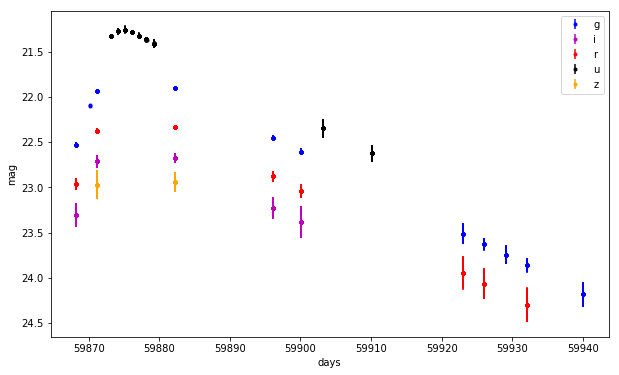

In [11]:
output_dict_list = transmetricSky.metricValues.data[0]
df = pd.DataFrame(output_dict_list[0])

plotlc(df[df['lcAboveThresh']==True], time_key='expMJD', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd')



## colossus_2665.db

In [13]:
opsdb_colossus_2665 = db.OpsimDatabase('colossus_2665.db')

Finish initializing metric
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night<300 for columns ['fieldDec', 'observationStartMJD', 'filter', 'fiveSigmaDepth', 'fieldRA']
Found 200573 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<300" constraint now.


/home/docmaf/repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/home/docmaf/repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.961047  dipole: lon: -167.958, lat: -17.3107, amp: 0.0771661
Plotting complete.


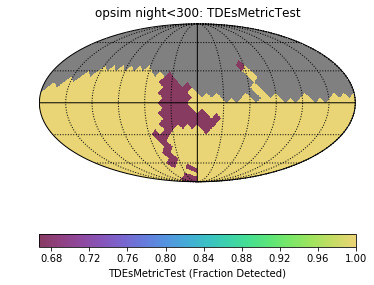

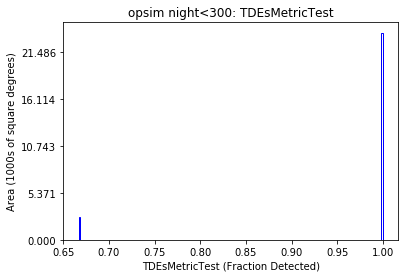

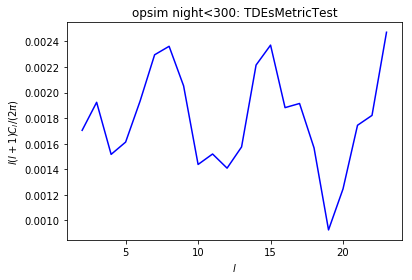

In [14]:
## get skymap
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=5, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=False)

slicer = slicers.HealpixSlicer(nside=8) 
sqlconstraint = 'night<300'

transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_colossus_2665, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)


In [15]:
## get light curve
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=5, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=True)

ra = np.array([34.39339593])
dec = np.array([-5.09032894])
slicer = slicers.UserPointsSlicer(ra, dec)

sqlconstraint = 'night<300'
transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_colossus_2665, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)


Finish initializing metric
Querying database SummaryAllProps with constraint night<300 for columns ['fieldDec', 'observationStartMJD', 'filter', 'fiveSigmaDepth', 'fieldRA']
Found 200573 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<300" constraint now.
Plotting complete.


/home/docmaf/repos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:517: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


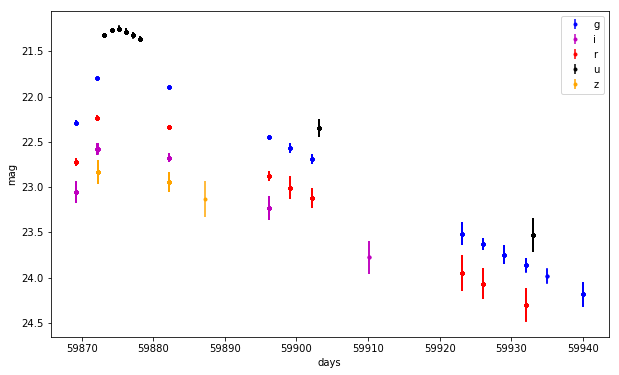

In [16]:
output_dict_list = transmetricSky.metricValues.data[0]
df = pd.DataFrame(output_dict_list[0])

plotlc(df[df['lcAboveThresh']==True], time_key='expMJD', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd')


## colossus_2667.db

In [17]:
opsdb_colossus_2667 = db.OpsimDatabase('colossus_2667.db')

In [ ]:
## get skymap
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=5, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=False)

slicer = slicers.HealpixSlicer(nside=8) 
sqlconstraint = 'night<300'

transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_colossus_2667, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)


In [ ]:
## get light curve
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=5, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=True)

ra = np.array([34.39339593])
dec = np.array([-5.09032894])
slicer = slicers.UserPointsSlicer(ra, dec)

sqlconstraint = 'night<300'
transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_colossus_2667, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

## pontus_2573.db

In [18]:
opsdb_pontus_2573 = db.OpsimDatabase('pontus_2573.db')

Finish initializing metric
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night<300 for columns ['fieldDec', 'observationStartMJD', 'filter', 'fiveSigmaDepth', 'fieldRA']
Found 200118 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<300" constraint now.


/home/docmaf/repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/home/docmaf/repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.973736  dipole: lon: -161.603, lat: 7.47298, amp: 0.0716932
Plotting complete.


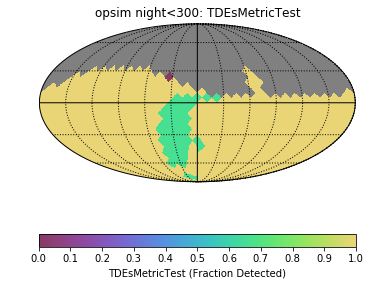

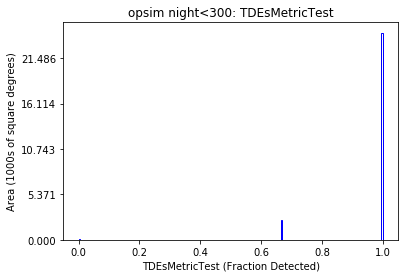

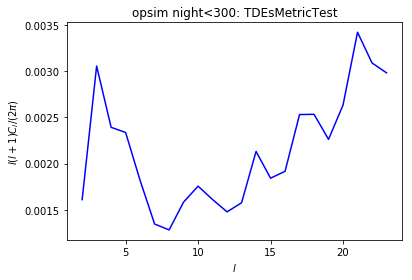

In [19]:
## get skymap
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=5, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=False)

slicer = slicers.HealpixSlicer(nside=8) 
sqlconstraint = 'night<300'

transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_pontus_2573, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

In [20]:
## get light curve
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=5, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=True)

ra = np.array([34.39339593])
dec = np.array([-5.09032894])
slicer = slicers.UserPointsSlicer(ra, dec)

sqlconstraint = 'night<300'
transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_pontus_2573, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)


Finish initializing metric
Querying database SummaryAllProps with constraint night<300 for columns ['fieldDec', 'observationStartMJD', 'filter', 'fiveSigmaDepth', 'fieldRA']
Found 200118 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<300" constraint now.
Plotting complete.


/home/docmaf/repos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:517: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


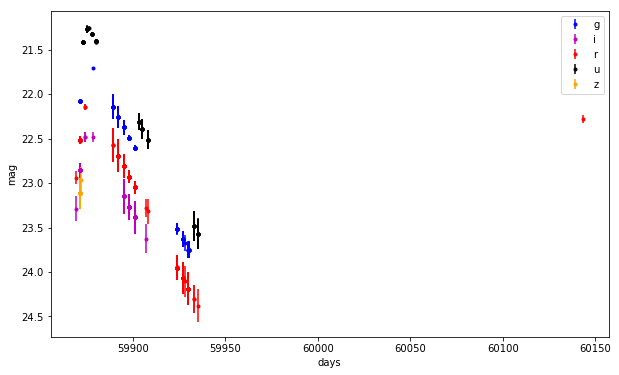

In [24]:
output_dict_list = transmetricSky.metricValues.data[0]
df = pd.DataFrame(output_dict_list[0])

plotlc(df[df['lcAboveThresh']], time_key='expMJD', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd')



## pontus_2579.db

In [ ]:
opsdb_pontus_2579 = db.OpsimDatabase('pontus_2579.db')